In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('training.csv')
df.shape

(39161, 19)

In [7]:
df.columns = ['ID','Lead_Date', 'campaign1', 'campaign2', 'products_purchased','signup_date','user1','user2','user3','user4','user5',
              'user6','user7','user8','user9','user10','user11','user12','Result']
df1=df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  39161 non-null  int64  
 1   Lead_Date           39161 non-null  object 
 2   campaign1           39161 non-null  int64  
 3   campaign2           39161 non-null  int64  
 4   products_purchased  18250 non-null  float64
 5   signup_date         24048 non-null  object 
 6   user1               39161 non-null  int64  
 7   user2               39161 non-null  int64  
 8   user3               39161 non-null  int64  
 9   user4               39161 non-null  int64  
 10  user5               39161 non-null  int64  
 11  user6               39161 non-null  int64  
 12  user7               39161 non-null  int64  
 13  user8               39161 non-null  int64  
 14  user9               39161 non-null  int64  
 15  user10              39161 non-null  int64  
 16  user

In [12]:
# Changing Date column into datetime type
df[['Lead_Date', 'signup_date']] =df[['Lead_Date', 'signup_date']].apply(pd.to_datetime, errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  39161 non-null  int64         
 1   Lead_Date           39161 non-null  datetime64[ns]
 2   campaign1           39161 non-null  int64         
 3   campaign2           39161 non-null  int64         
 4   products_purchased  18250 non-null  float64       
 5   signup_date         24048 non-null  datetime64[ns]
 6   user1               39161 non-null  int64         
 7   user2               39161 non-null  int64         
 8   user3               39161 non-null  int64         
 9   user4               39161 non-null  int64         
 10  user5               39161 non-null  int64         
 11  user6               39161 non-null  int64         
 12  user7               39161 non-null  int64         
 13  user8               39161 non-null  int64     

In [14]:
# Converting Lead_date in year, day, month, weekday, season
df['year']=df['Lead_Date'].dt.year
df['month']=df['Lead_Date'].dt.month_name()
df['day']=df['Lead_Date'].dt.day
df['weekday']=df['Lead_Date'].dt.day_name()
df['season']=df['Lead_Date'].dt.quarter
print(df[['Lead_Date', 'year','month','day','weekday','season']])

       Lead_Date  year     month  day weekday  season
0     2021-01-01  2021   January    1  Friday       1
1     2021-01-01  2021   January    1  Friday       1
2     2021-01-01  2021   January    1  Friday       1
3     2021-01-01  2021   January    1  Friday       1
4     2021-01-01  2021   January    1  Friday       1
...          ...   ...       ...  ...     ...     ...
39156 2021-12-31  2021  December   31  Friday       4
39157 2021-12-31  2021  December   31  Friday       4
39158 2021-12-31  2021  December   31  Friday       4
39159 2021-12-31  2021  December   31  Friday       4
39160 2021-12-31  2021  December   31  Friday       4

[39161 rows x 6 columns]


<AxesSubplot:xlabel='month'>

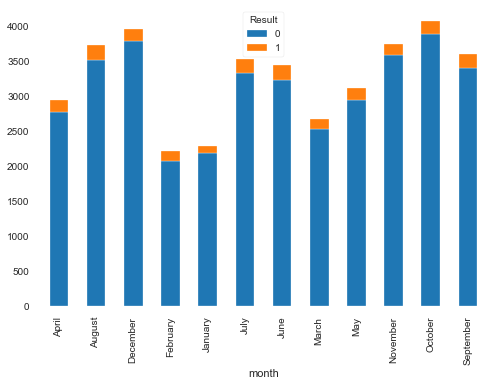

In [16]:
e=df.groupby(['month','Result'])['products_purchased'].sum()
e.unstack().sort_values(by='month').plot(kind='bar', stacked=True)

In [17]:
# Daily user activity based on date in  2021

user_activity_L= df.groupby(['Lead_Date'])[['user1','user2','user3','user4','user5', 'user6', 'user7', 'user8', 'user9', 
                                          'user10','user11', 'user12']].agg('sum')
user_activity_L.head(2)

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12
Lead_Date,,,,,,,,,,,,
2021-01-01,6,0,2,0,5,9,5,5,0,0,5,0
2021-01-02,16,0,6,1,6,20,15,7,1,0,12,0


In [18]:
# Total user per day activity in 2021

Total_user=pd.DataFrame(user_activity_L.sum(axis=1), columns=['Total_user_activity'])
Total_user.index.names=['Date']
Total_user.head()

,Total_user_activity
Date,
2021-01-01,37
2021-01-02,84
2021-01-03,127
2021-01-04,135
2021-01-05,185


In [19]:
# Daily User activity since 2015

user_activity_S= df.groupby(['signup_date'])[['user1','user2','user3','user4','user5', 'user6', 'user7', 'user8', 'user9', 
                                          'user10','user11', 'user12']].agg('sum')
user_activity_S.head(5)

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12
signup_date,,,,,,,,,,,,
2015-01-06,1,0,0,0,0,1,0,0,0,0,0,0
2015-04-11,1,1,0,1,0,0,0,0,1,0,0,0
2015-06-11,1,0,0,0,0,1,1,0,1,0,1,0
2015-06-20,0,0,1,0,1,1,0,0,0,0,0,0
2015-07-02,1,0,1,0,0,0,0,0,0,0,0,0


In [20]:
# Total user activity since 2015

Total_user2=pd.DataFrame(user_activity_S.sum(axis=1), columns=['Total_user'])
Total_user2.index.names = ['Date']
Total_user2.head(4)

,Total_user
Date,
2015-01-06,2
2015-04-11,4
2015-06-11,5
2015-06-20,3


In [21]:
# Weekly User Activity

user_activity_W= df.groupby(['weekday'])[['user1','user2','user3','user4','user5', 'user6', 'user7', 'user8', 'user9', 
                                          'user10','user11', 'user12']].agg('sum')
user_activity_W

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12
weekday,,,,,,,,,,,,
Friday,2269,31,635,65,864,2803,1632,1009,58,4,1232,1
Monday,2267,31,568,65,832,2847,1639,1005,71,4,1203,5
Saturday,2172,39,567,64,813,2730,1516,935,63,0,1218,1
Sunday,2252,36,578,61,860,2806,1669,956,63,2,1276,3
Thursday,2224,41,592,61,841,2772,1604,997,67,3,1183,4
Tuesday,2308,40,561,68,867,2855,1573,963,71,2,1259,4
Wednesday,2176,45,526,65,856,2761,1591,966,55,0,1203,4


In [22]:
# Weekly Total User Activity

Total_user_w=pd.DataFrame(user_activity_W.sum(axis=1), columns=['Total_user_activity'])
Total_user_w.index.names=['Week']
Total_user_w.head()

,Total_user_activity
Week,
Friday,10603
Monday,10537
Saturday,10118
Sunday,10562
Thursday,10389


Text(0, 0.5, 'No. of Users')

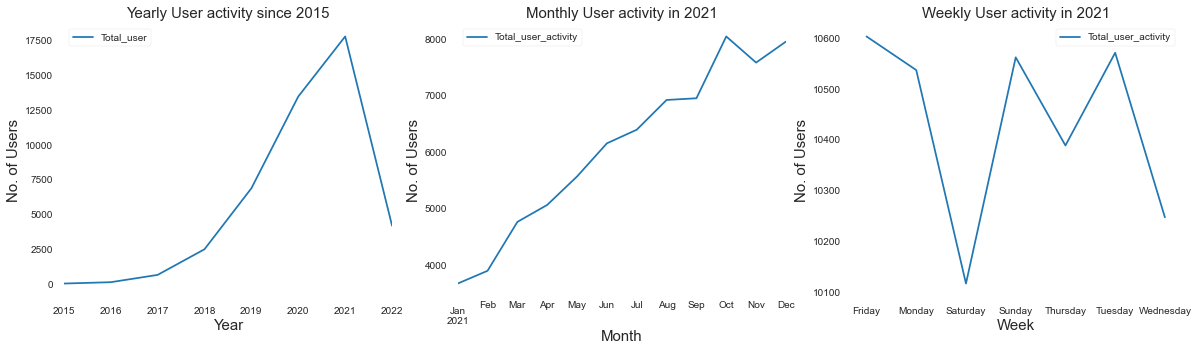

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Yearly User activity since 2015',fontsize = 15)
Total_user2.resample('y').sum().plot(ax=plt.gca())
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No. of Users',fontsize = 15)

plt.subplot(1,3,2)
plt.title('Monthly User activity in 2021',fontsize = 15)
Total_user.resample('M').sum().plot(ax=plt.gca())
plt.xlabel('Month',fontsize = 15)
plt.ylabel('No. of Users',fontsize = 15)

plt.subplot(1,3,3)
plt.title('Weekly User activity in 2021',fontsize = 15)
Total_user_w.plot(ax=plt.gca())
plt.xlabel('Week',fontsize = 15)
plt.ylabel('No. of Users',fontsize = 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  39161 non-null  int64         
 1   Lead_Date           39161 non-null  datetime64[ns]
 2   campaign1           39161 non-null  int64         
 3   campaign2           39161 non-null  int64         
 4   products_purchased  18250 non-null  float64       
 5   signup_date         24048 non-null  datetime64[ns]
 6   user1               39161 non-null  int64         
 7   user2               39161 non-null  int64         
 8   user3               39161 non-null  int64         
 9   user4               39161 non-null  int64         
 10  user5               39161 non-null  int64         
 11  user6               39161 non-null  int64         
 12  user7               39161 non-null  int64         
 13  user8               39161 non-null  int64     

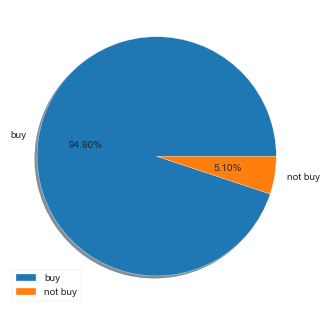

In [25]:
b=df.groupby(['Result']).size()
plt.pie(b, autopct='%0.2f%%', labels=['buy', 'not buy'],shadow=True)
plt.legend( loc = 'lower left')

In [26]:
# Checking Missing Values
df.isna().sum()

ID                        0
Lead_Date                 0
campaign1                 0
campaign2                 0
products_purchased    20911
signup_date           15113
user1                     0
user2                     0
user3                     0
user4                     0
user5                     0
user6                     0
user7                     0
user8                     0
user9                     0
user10                    0
user11                    0
user12                    0
Result                    0
year                      0
month                     0
day                       0
weekday                   0
season                    0
dtype: int64

In [27]:
# Filling missing values in Column products_purchased with 0

df.products_purchased.fillna(0.0, inplace=True)

<AxesSubplot:>

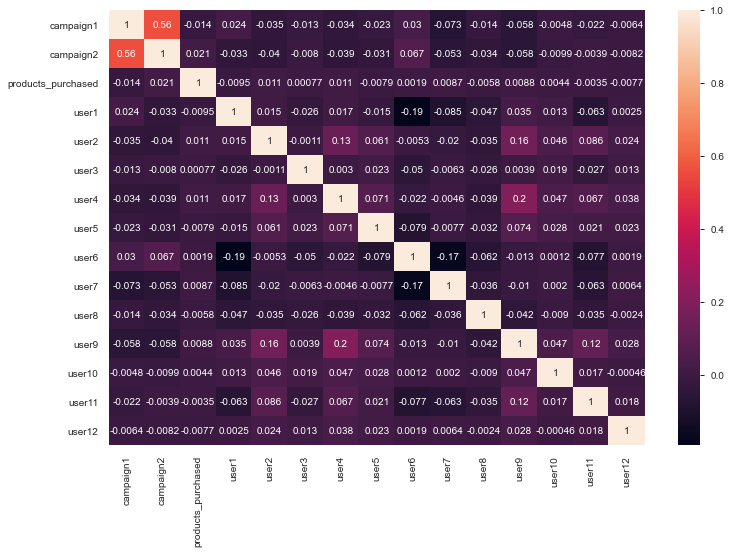

In [28]:
# Checking Multicorrelation

plt.figure(figsize=(12,8))
sns.heatmap(df1.drop(['ID', 'Result'], axis=1).corr(), annot= True)

In [29]:
test1=pd.read_csv('testing.csv')
#test.index += 1 
test1.columns = ['ID','Lead_Date', 'campaign1', 'campaign2', 'products_purchased','signup_date','user1','user2','user3','user4','user5',
              'user6','user7','user8','user9','user10','user11','user12']
test1[['Lead_Date', 'signup_date']] =test1[['Lead_Date', 'signup_date']].apply(pd.to_datetime, errors='coerce')
test=test1.copy()
test.shape

(13184, 18)

In [30]:
# Checking Missing Values

test.isna().sum()

ID                       0
Lead_Date                0
campaign1                0
campaign2                0
products_purchased    8136
signup_date           6649
user1                    0
user2                    0
user3                    0
user4                    0
user5                    0
user6                    0
user7                    0
user8                    0
user9                    0
user10                   0
user11                   0
user12                   0
dtype: int64

In [31]:
# Filling Missing Values in column products_purchased with 0

test['products_purchased'].fillna(0.0, inplace=True)

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [33]:
# Taking important features for training the model

x=df[['products_purchased','campaign1','campaign2','user1','user2','user3','user4','user5','user6','user7','user8',
       'user9','user10','user11','user12']]
y=df['Result']

In [34]:
xtest=test[['products_purchased','campaign1','campaign2','user1','user2','user3','user4','user5','user6','user7','user8',
             'user9','user10','user11','user12']]

In [35]:
# Using Xgboost Classifier to train the model

from xgboost import XGBClassifier
clfx=XGBClassifier()
clfx.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
y_pred= clfx.predict(x)
print('F1 Score for Training data: ' , f1_score(y, y_pred))

F1 Score for Training data:  0.7183544303797468


In [37]:
# Predicting test data using XGB model

ypred_x= clfx.predict(xtest)

In [38]:
# Saving prediction result in CSV File

XGB= pd.DataFrame({'id':test['ID'], 'buy':ypred_x})
XGB.set_index('id', inplace= True)
XGB.to_csv('XGB.csv')

In [39]:
#df=df.rename(columns={"index": "df_index"})
from pandas_profiling import ProfileReport
ProfileReport(x)

C:\Users\prach\anaconda3\lib\site-packages\pandas_profiling\utils\dataframe.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]